CUSTOMER SEGMENTATION AND MARKET BASKET ANALYSIS

In [ ]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt



from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



Data Understanding

In [ ]:
df = pd.read_csv('dec.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment
0,536365,85123A,Oil & Masala,6,01-12-2021 08:26,2.55,17850.0,Mumbai,14.9000,345.9000,Female,Cash
1,536365,71053,Beverages,6,01-12-2021 08:26,3.39,17850.0,Mumbai,24.8000,67.9000,Female,Cash
2,536365,84406B,Food Grains,8,01-12-2021 08:26,2.75,17850.0,Mumbai,30.0000,234.9000,Female,Cash
3,536365,84029G,Fruits & Veggies,6,01-12-2021 08:26,3.39,17850.0,Mumbai,26.1415,548.9715,Female,Ewallet
4,536365,84029E,Food Grains,6,01-12-2021 08:26,3.39,17850.0,Mumbai,3.8200,80.2200,Female,Cash


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53164 entries, 0 to 53163
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         53164 non-null  object 
 1   StockCode         53164 non-null  object 
 2   ProductsCategory  53164 non-null  object 
 3   Quantity          53164 non-null  int64  
 4   InvoiceDate       53164 non-null  object 
 5   UnitPrice         53164 non-null  float64
 6   CustomerID        34950 non-null  float64
 7   Cities            53164 non-null  object 
 8   Tax 5%            53164 non-null  float64
 9   Total             53164 non-null  float64
 10  Gender            53164 non-null  object 
 11  Payment           53164 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 4.9+ MB


In [ ]:
df.shape

(53164, 12)

In [ ]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID,Tax 5%,Total
count,53164.00,53164.00,34950.00,53164.00,53164.00
mean,8.64,5.76,15450.35,15.39,322.47
std,55.18,125.15,1745.40,11.69,245.34
min,-9360.00,0.00,12347.00,0.51,10.68
25%,1.00,1.25,14083.00,5.96,122.52
50%,2.00,2.51,15512.00,12.15,253.68
75%,8.00,4.25,17059.00,22.59,471.03
max,2880.00,13541.33,18273.00,49.65,1042.65


Data Cleaning

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df.sort_values('InvoiceNo', ascending=False)

,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment
52887,551299,21931,Fish,1,31-12-2021 16:43,4.13,NaN,Mumbai,28.4305,597.0405,Male,Cash
52886,551298,21928,Fish,1,31-12-2021 16:43,4.13,NaN,Mumbai,5.5305,116.1405,Female,Credit card
52885,551297,21914,Masalas,2,31-12-2021 16:43,2.46,NaN,Mumbai,2.6325,55.2825,Female,Credit card
52884,551296,21894,Fresh Fruits,13,31-12-2021 16:43,2.46,NaN,Mumbai,32.6150,684.9150,Male,Credit card
52883,551295,21884,Health Drinks,1,31-12-2021 16:43,1.63,NaN,Mumbai,1.9210,40.3410,Female,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...
3,536365,84029G,Fruits & Veggies,6,01-12-2021 08:26,3.39,17850.0,Mumbai,26.1415,548.9715,Female,Ewallet
1,536365,71053,Beverages,6,01-12-2021 08:26,3.39,17850.0,Mumbai,24.8000,67.9000,Female,Cash
5,536365,22752,Food Grains,2,01-12-2021 08:26,7.65,17850.0,Mumbai,16.2155,340.5255,Male,Credit card
6,536365,21730,Fruits & Veggies,6,01-12-2021 08:26,4.25,17850.0,Mumbai,23.2880,489.0480,Male,Ewallet


InvoiceNo that starts with the letter 'C' indicates a canceled transaction. We will delete this data, because we will analyze only successful transactions

In [ ]:
#Delete canceled transaction rows
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape


(52436, 12)

In [ ]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,CustomerID,18176,34.663208
1,InvoiceNo,0,0.000000
2,StockCode,0,0.000000
3,ProductsCategory,0,0.000000
4,Quantity,0,0.000000
5,InvoiceDate,0,0.000000
6,UnitPrice,0,0.000000
7,Cities,0,0.000000
8,Tax 5%,0,0.000000
9,Total,0,0.000000


We have missing values in the CustomerID and category columns. Because the data is large, dropping the missing values will not cause a problem in data size. Additionally, CustomerlD and Productscategory can not be filled because it will affect the analysis later.

In [ ]:
df = df.dropna(subset = ['CustomerID', 'ProductsCategory'])

In [ ]:
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,ProductsCategory,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Cities,0,0.0
8,Tax 5%,0,0.0
9,Total,0,0.0


In [ ]:
#Remove spaces at the beginning or end of sentences
df['ProductsCategory'] = df['ProductsCategory'].str.strip()

In [ ]:
df.shape

(34260, 12)

In [ ]:
df.info()
df['CustomerID'] = df['CustomerID'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34260 entries, 0 to 53163
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         34260 non-null  object 
 1   StockCode         34260 non-null  object 
 2   ProductsCategory  34260 non-null  object 
 3   Quantity          34260 non-null  int64  
 4   InvoiceDate       34260 non-null  object 
 5   UnitPrice         34260 non-null  float64
 6   CustomerID        34260 non-null  float64
 7   Cities            34260 non-null  object 
 8   Tax 5%            34260 non-null  float64
 9   Total             34260 non-null  float64
 10  Gender            34260 non-null  object 
 11  Payment           34260 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Tax 5%,Total
count,34260.000000,34260.000000,34260.000000,34260.000000,34260.000000
mean,12.200759,3.129399,15456.287974,15.374488,322.042940
std,44.141584,5.371655,1747.093222,11.677248,245.093519
min,-100.000000,0.000000,12347.000000,0.508500,10.678500
25%,2.000000,1.250000,14083.000000,5.977000,125.055000
50%,4.000000,1.950000,15513.000000,12.096000,253.512000
75%,12.000000,3.750000,17059.000000,22.491000,470.988000
max,2880.000000,295.000000,18273.000000,49.650000,1042.650000


#Exploratory Data Analysis

What products do customers buy the most?

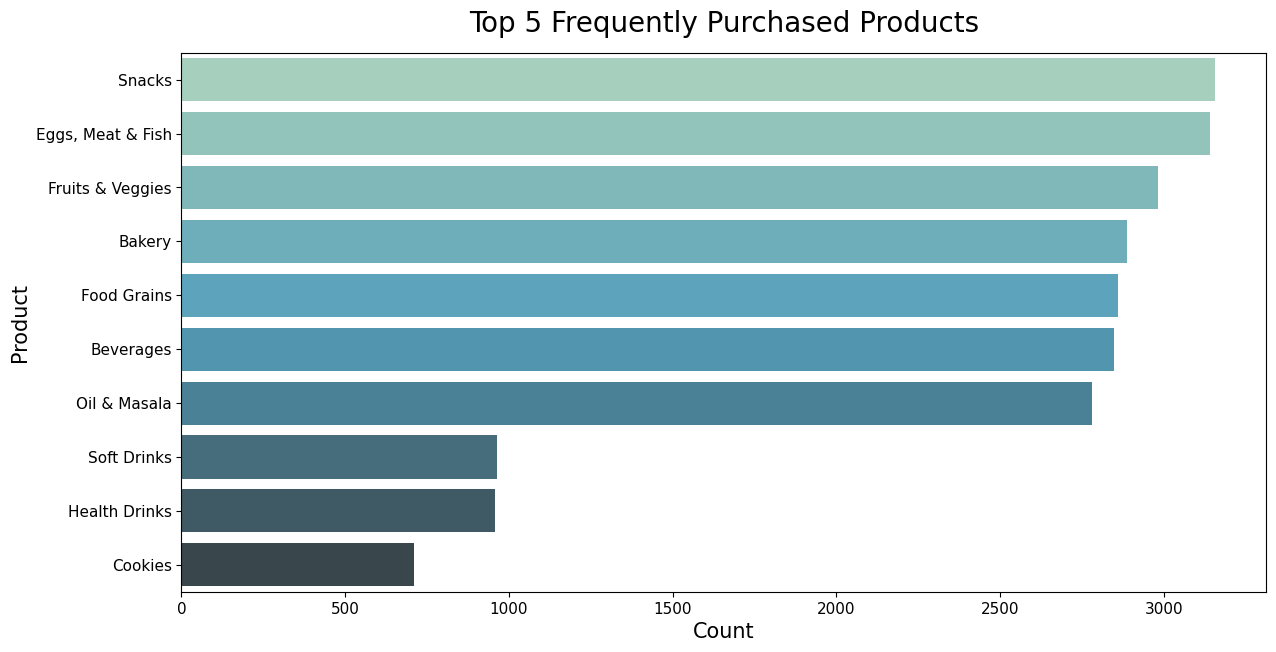

In [ ]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = df['ProductsCategory'],
                   order = df["ProductsCategory"].value_counts().iloc[:10].index,
                   palette = "GnBu_d")
ax.set_title("Top 5 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Count", size = 15)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

How many orders (per day)?

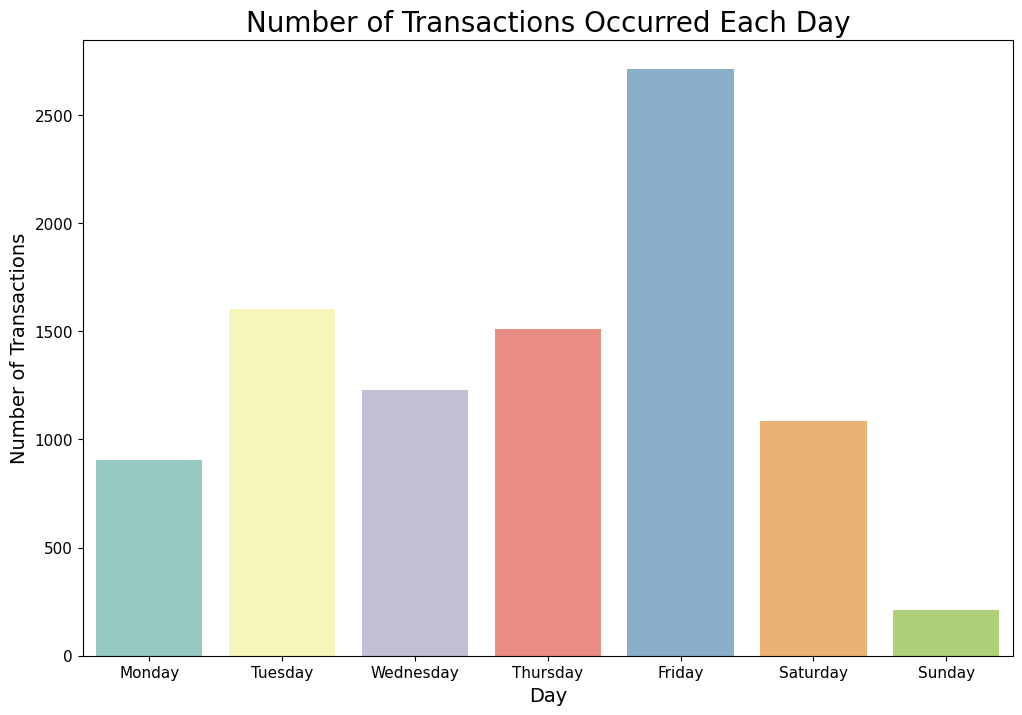

In [ ]:
# Convert 'InvoiceDate' column to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the day of the week from 'InvoiceDate' (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Group by day of the week and count unique 'InvoiceNo' values
order_day = df.groupby('DayOfWeek')['InvoiceNo'].nunique()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=order_day.index, y=order_day.values, palette="Set3")
ax.set_title('Number of Transactions Occurred Each Day', size=20)
ax.set_xlabel('Day', size=14)
ax.set_ylabel('Number of Transactions', size=14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

How many orders (per hour)?

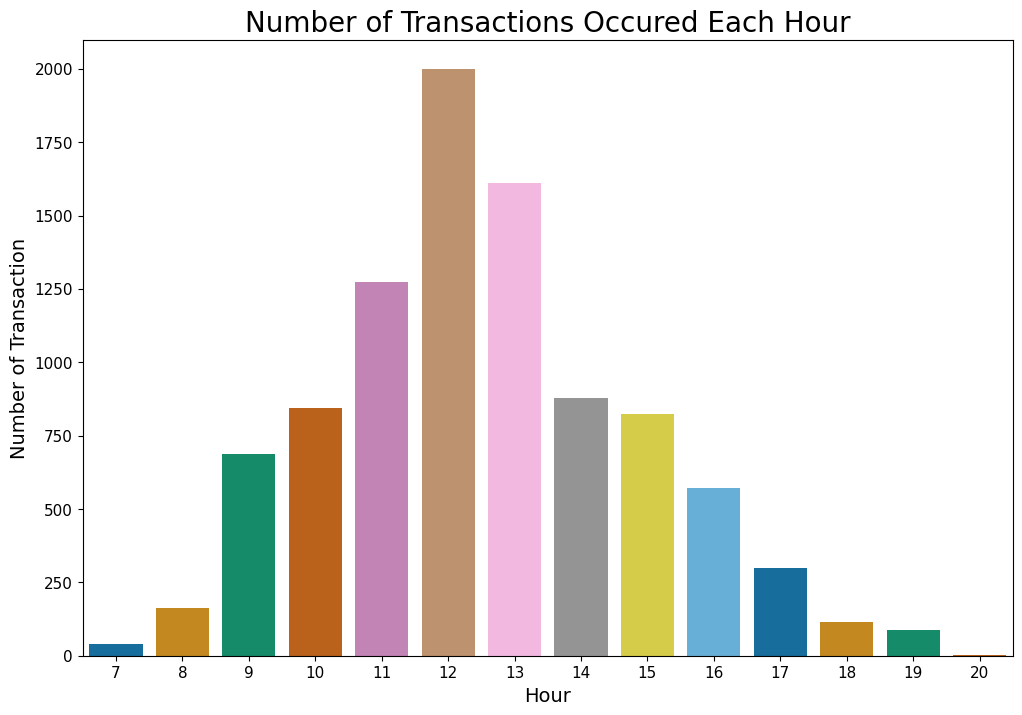

In [ ]:
order_hour = df.groupby(df['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_hour.reset_index(), palette = "colorblind")
ax.set_title('Number of Transactions Occured Each Hour', size = 20)
ax.set_xlabel('Hour', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

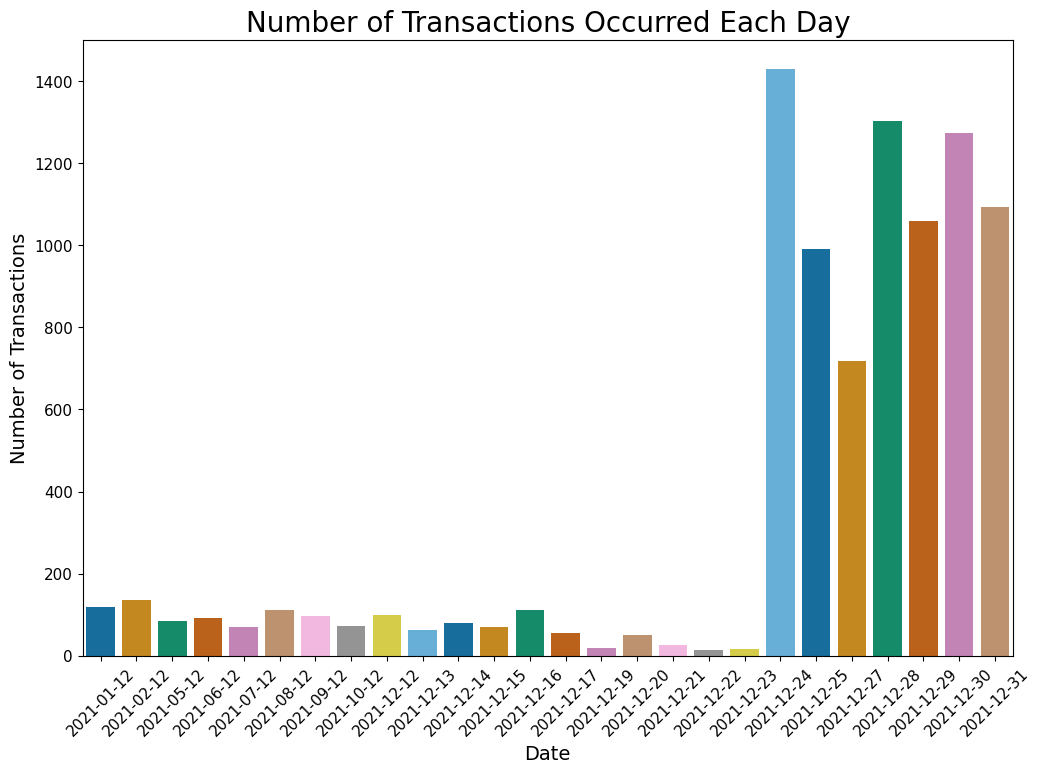

In [ ]:
# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the number of transactions per day
order_day = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique()

# Create a bar plot for day-to-day transactions
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=order_day.index, y=order_day.values, palette="colorblind")
ax.set_title('Number of Transactions Occurred Each Day', size=20)
ax.set_xlabel('Date', size=14)
ax.set_ylabel('Number of Transactions', size=14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.xticks(rotation=45)
plt.show()

Most orders are between 12 AM and 1PM. There is a possibility because at that time people take a break from work and can order goods at supermarket

Who are the 5 customers who spend the most money on Online Retail?

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment,DayOfWeek,TotalPrice
0,536365,85123A,Oil & Masala,6,2021-01-12 08:26:00,2.55,17850,Mumbai,14.9000,345.9000,Female,Cash,1,15.30
1,536365,71053,Beverages,6,2021-01-12 08:26:00,3.39,17850,Mumbai,24.8000,67.9000,Female,Cash,1,20.34
2,536365,84406B,Food Grains,8,2021-01-12 08:26:00,2.75,17850,Mumbai,30.0000,234.9000,Female,Cash,1,22.00
3,536365,84029G,Fruits & Veggies,6,2021-01-12 08:26:00,3.39,17850,Mumbai,26.1415,548.9715,Female,Ewallet,1,20.34
4,536365,84029E,Food Grains,6,2021-01-12 08:26:00,3.39,17850,Mumbai,3.8200,80.2200,Female,Cash,1,20.34


In [ ]:
price_cust = pd.pivot_table(df, index='CustomerID', values='TotalPrice', aggfunc=np.sum)
print('The following are 5 customers who spend the most money on Online Retail:')
price_cust.sort_values('TotalPrice', ascending=False)[:5]

The following are 5 customers who spend the most money on Online Retail:


,TotalPrice
CustomerID,
18102,33347.93
14646,30054.28
15061,20823.22
16029,14603.40
17450,13429.64


Who are the five most frequent customer shopping in Online Retail?

In [ ]:
order_cust = pd.pivot_table(df, index='CustomerID', values='InvoiceNo', aggfunc=pd.Series.nunique)
print('The following are the 5 customers who most frequently shop at Online Retail:')
order_cust.sort_values('InvoiceNo', ascending=False)[:5]

The following are the 5 customers who most frequently shop at Online Retail:


,InvoiceNo
CustomerID,
12748,135
14646,134
13263,125
14911,122
14159,117


Customer with ID 12748 is the most frequent customer shopping in online retail, with 135 transactions.
Customers with ID 14646 are customers who frequently shop and spend a lot of money at online retail.

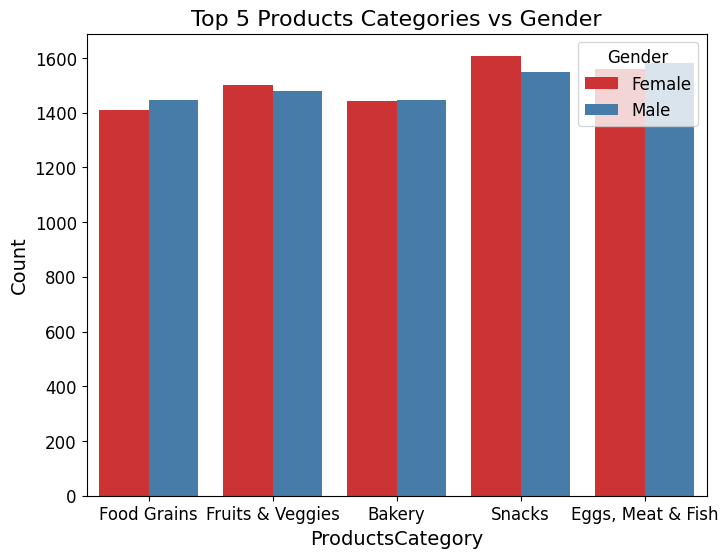

In [ ]:
# Calculate the top 5 product categories by count
top_categories = df['ProductsCategory'].value_counts().head(5).index

# Filter the DataFrame for the top 5 categories
df_filtered = df[df['ProductsCategory'].isin(top_categories)]

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='ProductsCategory', hue='Gender', palette='Set1')
plt.title('Top 5 Products Categories vs Gender', fontsize=16)
plt.xlabel('ProductsCategory', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=12)

# Show the plot
plt.show()






Time Cohorts
First of all, we will retrieve the InvoiceMonth data.

In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.head()


,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment,DayOfWeek,TotalPrice,InvoiceMonth
0,536365,85123A,Oil & Masala,6,2021-01-12 08:26:00,2.55,17850,Mumbai,14.9000,345.9000,Female,Cash,1,15.30,2021-01-01
1,536365,71053,Beverages,6,2021-01-12 08:26:00,3.39,17850,Mumbai,24.8000,67.9000,Female,Cash,1,20.34,2021-01-01
2,536365,84406B,Food Grains,8,2021-01-12 08:26:00,2.75,17850,Mumbai,30.0000,234.9000,Female,Cash,1,22.00,2021-01-01
3,536365,84029G,Fruits & Veggies,6,2021-01-12 08:26:00,3.39,17850,Mumbai,26.1415,548.9715,Female,Ewallet,1,20.34,2021-01-01
4,536365,84029E,Food Grains,6,2021-01-12 08:26:00,3.39,17850,Mumbai,3.8200,80.2200,Female,Cash,1,20.34,2021-01-01


Next, we will create a CohortMonth, which is the time when customers first shop.

In [ ]:
group = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = group.transform('min')
df.head()

,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment,DayOfWeek,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,Oil & Masala,6,2021-01-12 08:26:00,2.55,17850,Mumbai,14.9000,345.9000,Female,Cash,1,15.30,2021-01-01,2021-01-01
1,536365,71053,Beverages,6,2021-01-12 08:26:00,3.39,17850,Mumbai,24.8000,67.9000,Female,Cash,1,20.34,2021-01-01,2021-01-01
2,536365,84406B,Food Grains,8,2021-01-12 08:26:00,2.75,17850,Mumbai,30.0000,234.9000,Female,Cash,1,22.00,2021-01-01,2021-01-01
3,536365,84029G,Fruits & Veggies,6,2021-01-12 08:26:00,3.39,17850,Mumbai,26.1415,548.9715,Female,Ewallet,1,20.34,2021-01-01,2021-01-01
4,536365,84029E,Food Grains,6,2021-01-12 08:26:00,3.39,17850,Mumbai,3.8200,80.2200,Female,Cash,1,20.34,2021-01-01,2021-01-01


In [ ]:
def date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

In [ ]:
invoice_year, invoice_month, _ = date(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = date(df, 'CohortMonth')

Furthermore, the month difference will be calculated between the first customer shopping at the retail store and the invoice time.
Difference in years and months

In [ ]:
diff_year = invoice_year - cohort_year
diff_month = invoice_month - cohort_month

The IndexTime column describes the month difference between the first purchase and the purchase on InvoiceMonth. An addition is made by 1 so that the first month is counted as 1, not 0.

In [ ]:
df['IndexTime'] = diff_year*12 + diff_month + 1
df.head()

,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment,DayOfWeek,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,Oil & Masala,6,2021-01-12 08:26:00,2.55,17850,Mumbai,14.9000,345.9000,Female,Cash,1,15.30,2021-01-01,2021-01-01,1
1,536365,71053,Beverages,6,2021-01-12 08:26:00,3.39,17850,Mumbai,24.8000,67.9000,Female,Cash,1,20.34,2021-01-01,2021-01-01,1
2,536365,84406B,Food Grains,8,2021-01-12 08:26:00,2.75,17850,Mumbai,30.0000,234.9000,Female,Cash,1,22.00,2021-01-01,2021-01-01,1
3,536365,84029G,Fruits & Veggies,6,2021-01-12 08:26:00,3.39,17850,Mumbai,26.1415,548.9715,Female,Ewallet,1,20.34,2021-01-01,2021-01-01,1
4,536365,84029E,Food Grains,6,2021-01-12 08:26:00,3.39,17850,Mumbai,3.8200,80.2200,Female,Cash,1,20.34,2021-01-01,2021-01-01,1


Recency, Frequency, Monetary (RFM)

In [ ]:
print('Min: {}\nMax: {}'.format(min(df['InvoiceDate']), max(df['InvoiceDate'])))

Min: 2021-01-12 08:26:00
Max: 2021-12-31 19:55:00


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Category,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,DayOfWeek,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,Oil & Masala,6,2021-01-12 08:26:00,2.55,17850,Mumbai,1,15.30,2021-01-01,2021-01-01,1
1,536365,71053,Beverages,6,2021-01-12 08:26:00,3.39,17850,Mumbai,1,20.34,2021-01-01,2021-01-01,1
2,536365,84406B,Food Grains,8,2021-01-12 08:26:00,2.75,17850,Mumbai,1,22.00,2021-01-01,2021-01-01,1
3,536365,84029G,Fruits & Veggies,6,2021-01-12 08:26:00,3.39,17850,Mumbai,1,20.34,2021-01-01,2021-01-01,1
4,536365,84029E,Food Grains,6,2021-01-12 08:26:00,3.39,17850,Mumbai,1,20.34,2021-01-01,2021-01-01,1


We assume that we are analyzing on analysis_date. The analysis date is 1 day from the last date on InvoiceDate.

In [ ]:
analysis_date = max(df['InvoiceDate']) + dt.timedelta(days= 1)
print((analysis_date).date())

2022-01-01


In [ ]:
rfm_cust = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})
rfm_cust.rename(columns= {'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalPrice':'Monetary'}, inplace = True)
rfm_cust

,Recency,Frequency,Monetary
CustomerID,,,
12347,173,31,711.79
12348,16,17,892.80
12370,15,91,1868.02
12377,12,43,1001.52
12383,10,37,600.72
...,...,...,...
18245,13,27,365.73
18259,142,7,376.30
18260,16,11,230.70


RFM quartile
We will divide the RFM into 4 parts.

In [ ]:
r_labels = range(1,5) #The longer the customer last purchase, the worse it is
f_labels = range(4,0,-1) #The more purchases the customer makes, the better it is
m_labels = range(4,0,-1) #The more money the customer spends, the better it is

r_quartiles = pd.qcut(rfm_cust['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm_cust['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm_cust['Monetary'], q=4, labels=m_labels)

rfm_cust = rfm_cust.assign(R = r_quartiles.values, F = f_quartiles.values, M = m_quartiles.values)

rfm_cust

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347,173,31,711.79,4,2,1
12348,16,17,892.80,2,3,1
12370,15,91,1868.02,2,1,1
12377,12,43,1001.52,2,1,1
12383,10,37,600.72,2,2,2
...,...,...,...,...,...,...
18245,13,27,365.73,2,2,2
18259,142,7,376.30,3,4,2
18260,16,11,230.70,2,3,3


In [ ]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm_cust['RFM_Segment'] = rfm_cust.apply(join_rfm, axis=1)
rfm_cust['RFM_Score'] = rfm_cust[['R', 'F', 'M']].sum(axis=1)

rfm_cust.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347,173,31,711.79,4,2,1,4.02.01.0,7
12348,16,17,892.80,2,3,1,2.03.01.0,6
12370,15,91,1868.02,2,1,1,2.01.01.0,4
12377,12,43,1001.52,2,1,1,2.01.01.0,4
12383,10,37,600.72,2,2,2,2.02.02.0,6


As we can see, the lowest and the highest rated RFM segments are among the largest ones

Summary metrics for each RFM Score

In [ ]:
rfm_cust.groupby('RFM_Segment').size().sort_values(ascending=False)

RFM_Segment
1.01.01.0    68
3.04.04.0    50
4.04.04.0    47
1.04.04.0    45
2.01.01.0    41
             ..
4.04.02.0     3
1.01.04.0     3
4.01.04.0     1
2.01.04.0     1
2.02.04.0     1
Length: 64, dtype: int64

In [ ]:
rfm_cust.groupby('RFM_Score').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3             3.0     104.8   2824.7    68
4             7.1      61.1   1731.5    89
5            17.0      50.5   1121.9   108
6            35.2      36.1    653.3   122
7            63.5      29.7    442.8   165
8            81.9      21.3    380.1   138
9            88.2      12.5    249.1   163
10          133.9      10.5    192.9   112
11          154.0       6.7    158.0    83
12          267.8       5.2    117.3    47

Customer Loyalty

In [ ]:
loyalty_level =['Platinum','Gold','Silver','Bronze']
loyalty_quartile = pd.qcut(rfm_cust['RFM_Score'], q=4, labels=loyalty_level)
rfm_cust['Loyalty_Level'] = loyalty_quartile.values
rfm_cust

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Loyalty_Level
CustomerID,,,,,,,,,
12347,173,31,711.79,4,2,1,4.02.01.0,7,Gold
12348,16,17,892.80,2,3,1,2.03.01.0,6,Platinum
12370,15,91,1868.02,2,1,1,2.01.01.0,4,Platinum
12377,12,43,1001.52,2,1,1,2.01.01.0,4,Platinum
12383,10,37,600.72,2,2,2,2.02.02.0,6,Platinum
...,...,...,...,...,...,...,...,...,...
18245,13,27,365.73,2,2,2,2.02.02.0,6,Platinum
18259,142,7,376.30,3,4,2,3.04.02.0,9,Silver
18260,16,11,230.70,2,3,3,2.03.03.0,8,Silver


In [ ]:
rfm_cust.groupby('Loyalty_Level').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                 mean      mean     mean count
Loyalty_Level                                 
Platinum         18.0      57.9   1413.5   387
Gold             63.5      29.7    442.8   165
Silver           85.3      16.5    309.1   301
Bronze          166.8       8.1    166.2   242

Customer Segmentation Using KMeans

In [ ]:
def rfm_dist(column):
    r_skew = rfm_cust[column].skew()

    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})
    plt.title('{} Distribution'.format(column))

    plt.show()
    print('Skewness value of data {}: {}'.format(column, r_skew))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-19f3816347d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})


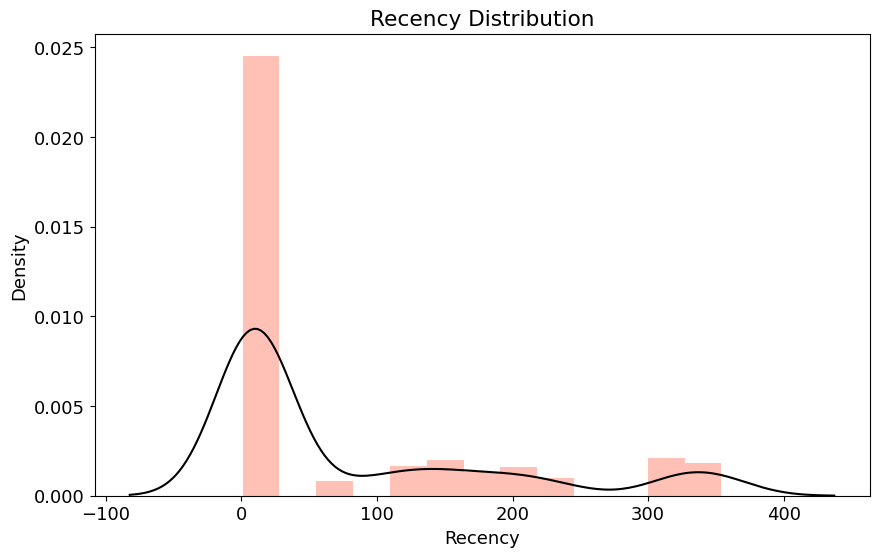

Skewness value of data Recency: 1.3939828525654057


In [ ]:
rfm_dist('Recency')

<ipython-input-40-19f3816347d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})


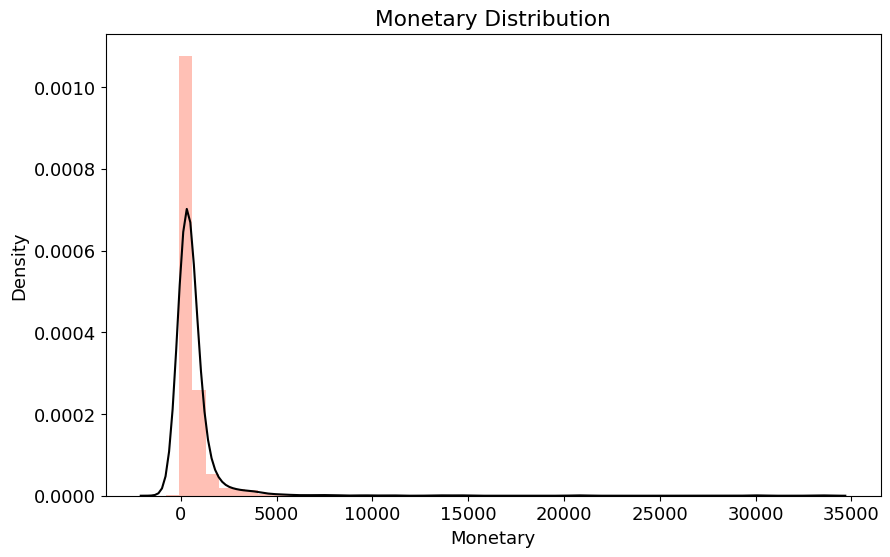

Skewness value of data Monetary: 11.981327042366063


In [ ]:
rfm_dist('Monetary')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-19f3816347d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})


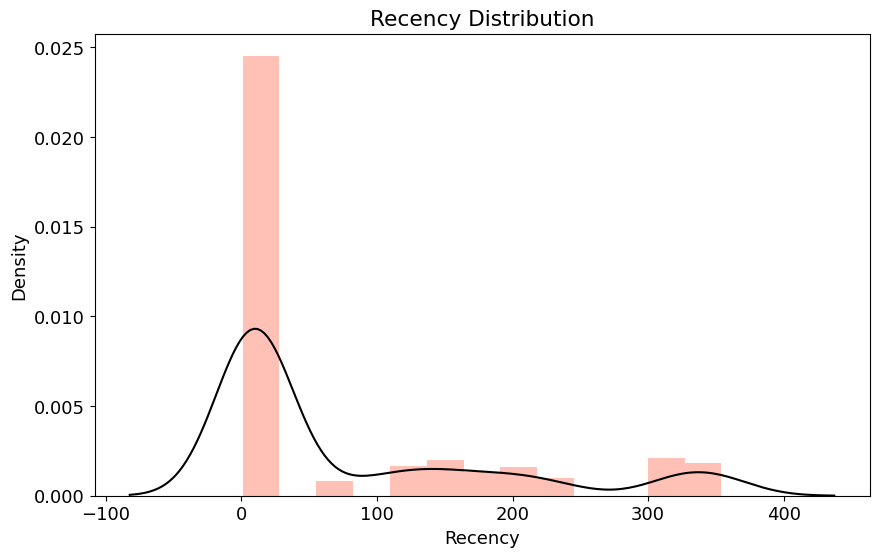

Skewness value of data Recency: 1.3939828525654057


In [ ]:
rfm_dist('Recency')

In [ ]:
print("The following is the skewness value for Recency, Frequency, and Monetary data:",
      '\nRecency   : {}'.format(rfm_cust['Recency'].skew()),
      '\nFrequency : {}'.format(rfm_cust['Frequency'].skew()),
      '\nMonetary  : {}'.format(rfm_cust['Monetary'].skew()))

The following is the skewness value for Recency, Frequency, and Monetary data: 
Recency   : 1.446763649528462 
Frequency : 7.103887831704936 
Monetary  : 11.981327042366063


In [ ]:
rfm_norm = rfm_cust[['Recency','Frequency','Monetary']]
rfm_norm.describe()

,Recency,Frequency,Monetary
count,1095.000000,1095.000000,1095.000000
mean,76.235616,31.287671,688.022630
std,108.979239,42.541263,1805.178933
min,1.000000,1.000000,-751.900000
25%,7.000000,9.000000,196.420000
50%,16.000000,19.000000,335.300000
75%,142.000000,41.000000,628.215000
max,354.000000,768.000000,33347.930000


In [ ]:
power = PowerTransformer().fit(rfm_norm)
rfm_transform =power.transform(rfm_norm)

#Standard Scaler to Scale the data
scaler = StandardScaler().fit(rfm_transform)
rfm_transform = scaler.transform(rfm_transform)

rfm_transform =pd.DataFrame(rfm_transform, index=rfm_norm.index, columns=rfm_norm.columns)
print('These are the mean value after data transformation:')
rfm_transform.describe()

These are the mean value after data transformation:


,Recency,Frequency,Monetary
count,1.095000e+03,1.095000e+03,1.095000e+03
mean,1.297795e-17,6.488975e-18,-1.622244e-17
std,1.000457e+00,1.000457e+00,1.000457e+00
min,-1.706107e+00,-2.069210e+00,-1.407582e+01
25%,-6.326872e-01,-6.590469e-01,-3.425689e-01
50%,-1.184776e-01,-4.871327e-03,-1.952079e-01
75%,1.110467e+00,7.287232e-01,7.318496e-02
max,1.548347e+00,3.969159e+00,1.343060e+01


<ipython-input-45-355d6857d7ab>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_transform[column], color = 'g', kde_kws={"color": "k"})


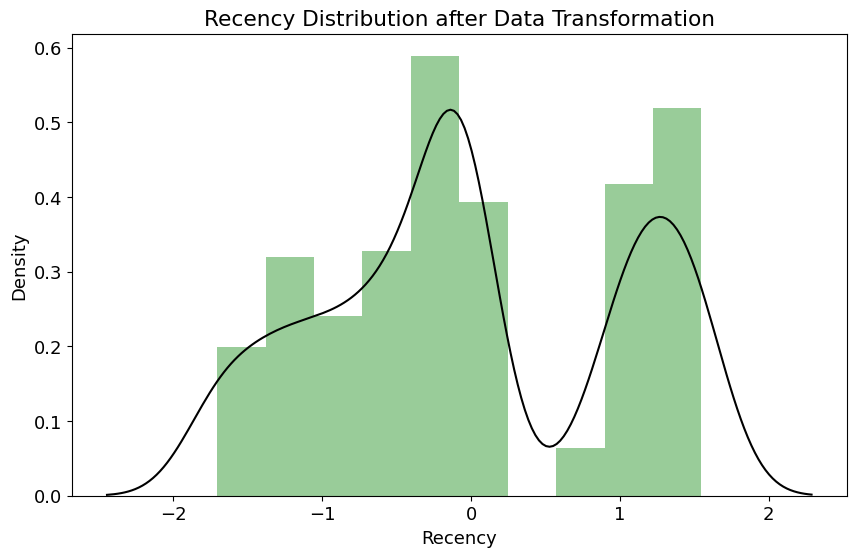

Skewness value of data Recency after data transformation: 0.07441604290823405


In [ ]:
def rfm_dist_transform(column):
    r_skew_transform = rfm_transform[column].skew()

    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_transform[column], color = 'g', kde_kws={"color": "k"})
    plt.title('{} Distribution after Data Transformation'.format(column))

    plt.show()
    print('Skewness value of data {} after data transformation: {}'.format(column, r_skew_transform))
rfm_dist_transform('Recency')

<ipython-input-45-355d6857d7ab>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_transform[column], color = 'g', kde_kws={"color": "k"})


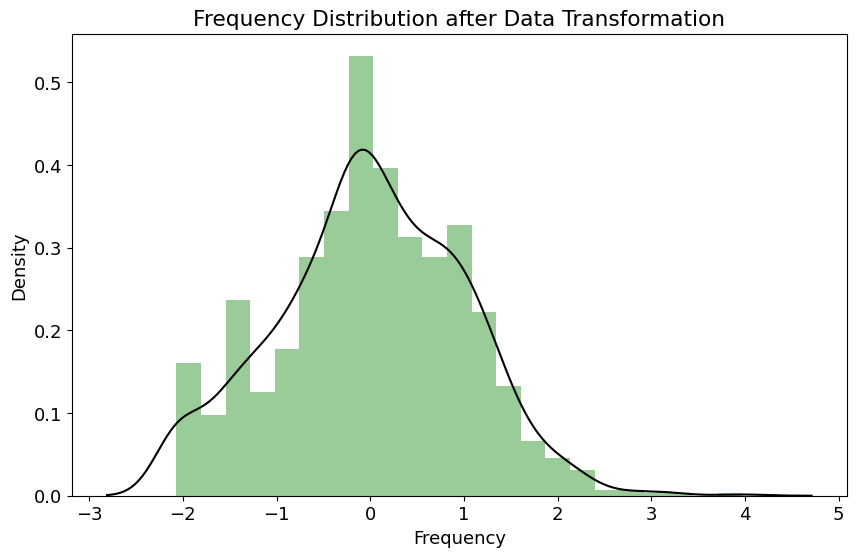

Skewness value of data Frequency after data transformation: -0.003797496500730807


In [ ]:
rfm_dist_transform('Frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-355d6857d7ab>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_transform[column], color = 'g', kde_kws={"color": "k"})


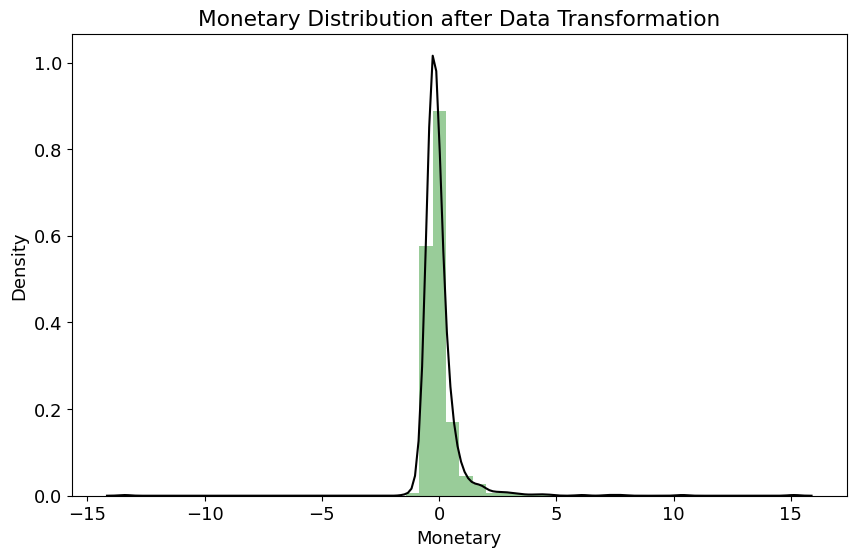

Skewness value of data Monetary after data transformation: 3.8637756066018176


In [ ]:
rfm_dist_transform('Monetary')

In [ ]:
print("The following is the skewness value for Recency, Frequency, and Monetary data after data transformation:",
      '\nRecency   : {}'.format(rfm_transform['Recency'].skew()),
      '\nFrequency : {}'.format(rfm_transform['Frequency'].skew()),
      '\nMonetary  : {}'.format(rfm_transform['Monetary'].skew()))

The following is the skewness value for Recency, Frequency, and Monetary data after data transformation: 
Recency   : 0.07441604290823405 
Frequency : -0.003797496500730807 
Monetary  : 3.403434868479917


Determining the number of clusters by using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

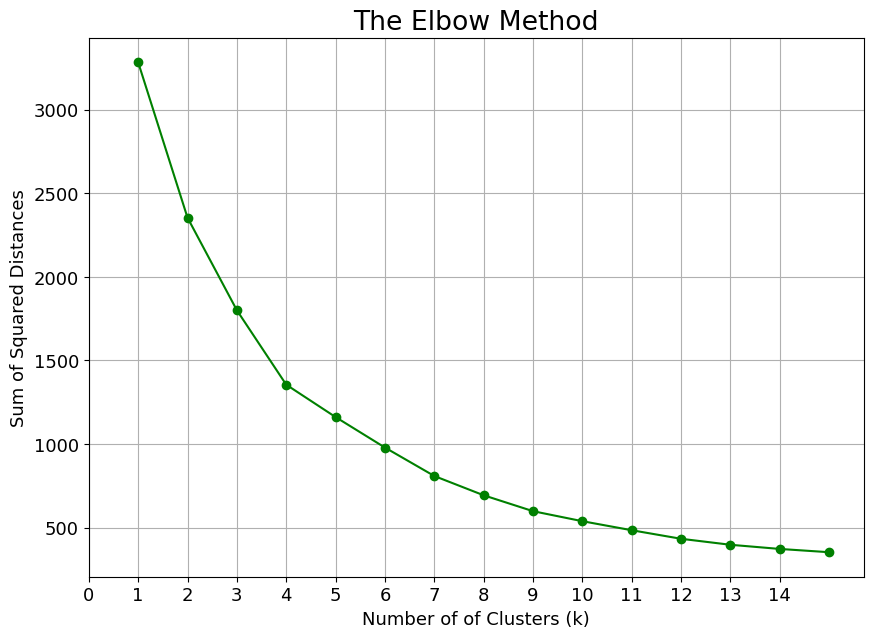

In [ ]:
#Elbow Method
inertia=[]
cl = 15

for i in range(1,cl+1):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(rfm_transform)
    inertia.append(kmeans.inertia_) #sum of squared distances to closest cluster center


fig,ax = plt.subplots()
fig.set_size_inches(10, 7)
plt.rcParams['font.size']=16
plt.plot(range(1,cl+1), inertia, 'o-', color = 'g')
plt.xticks(np.arange(0, 15, 1.0))
plt.title('The Elbow Method')
plt.xlabel('Number of of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

KMeans Clustering

In [ ]:
n = 4

model = KMeans(n_clusters=n,init='k-means++',max_iter=300, n_init=10, random_state=0)

#fit the data
model_kmeans = model.fit(rfm_transform)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model_kmeans.labels_

centers = model_kmeans.cluster_centers_

#Append labels/clusters to scaled and original dataframe
rfm_cust['Cluster'] = labels
clusters_seg = pd.DataFrame(rfm_transform,columns=['Recency','Frequency','Monetary'])
clusters_seg['Cluster'] = labels+1

clusters = []

for i in range(0,n):
    clusters.append(rfm_cust[rfm_cust['Cluster']==i])

values = power.inverse_transform(scaler.inverse_transform(centers))

for i in range(0,n):
    print('-----CLUSTER {}-----'.format(i+1))
    print('Number of Customers: {}'.format(clusters[i].shape[0]))
    print('(Recency)Last Day Shopping: {:4.0f}'.format(values[i][0]))
    print('(Frec)Purchases Frequency : {:4.0f}'.format(values[i][1]))
    print('(Monetary)Total purchases: £{:6.2f}\n'.format(values[i][2]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

In [ ]:
rfm_transform['Cluster'] = model_kmeans.labels_
rfm_transform.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,1.208959,0.455740,0.143384,1
12348,-0.118478,-0.106214,0.288811,2
12370,-0.158169,1.543375,0.977299,0
12377,-0.296279,0.775907,0.372574,0
12383,-0.409869,0.627693,0.049591,0


In [ ]:
rfm_cust.groupby('Cluster').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          13.3      61.5   1067.8   347
1         213.8      21.0    346.9   350
2          10.3      11.4    309.1   390
3           3.6     138.9  17613.0     8

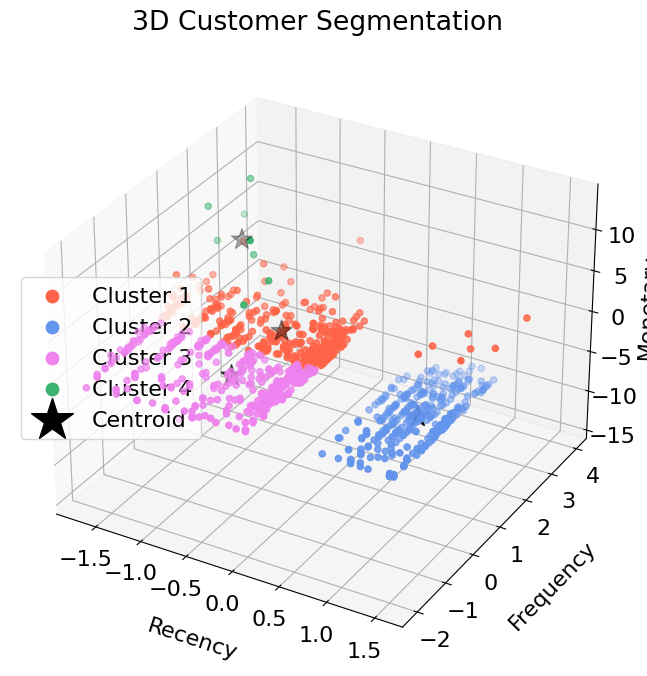

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points for each cluster
ax.scatter(rfm_transform[rfm_transform['Cluster'] == 0]['Recency'],
           rfm_transform[rfm_transform['Cluster'] == 0]['Frequency'],
           rfm_transform[rfm_transform['Cluster'] == 0]['Monetary'],
           color='tomato', label='Cluster 1')

ax.scatter(rfm_transform[rfm_transform['Cluster'] == 1]['Recency'],
           rfm_transform[rfm_transform['Cluster'] == 1]['Frequency'],
           rfm_transform[rfm_transform['Cluster'] == 1]['Monetary'],
           color='cornflowerblue', label='Cluster 2')

ax.scatter(rfm_transform[rfm_transform['Cluster'] == 2]['Recency'],
           rfm_transform[rfm_transform['Cluster'] == 2]['Frequency'],
           rfm_transform[rfm_transform['Cluster'] == 2]['Monetary'],
           color='violet', label='Cluster 3')

ax.scatter(rfm_transform[rfm_transform['Cluster'] == 3]['Recency'],
           rfm_transform[rfm_transform['Cluster'] == 3]['Frequency'],
           rfm_transform[rfm_transform['Cluster'] == 3]['Monetary'],
           color='mediumseagreen', label='Cluster 4')

# Scatter centroids
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=250, c='k', marker='*', label='Centroid')

# Add legend
plt.legend(loc='center left', markerscale=2)

# Set title and labels
plt.title('3D Customer Segmentation', pad=15)
ax.set_xlabel('Recency', labelpad=15)
ax.set_ylabel('Frequency', labelpad=15)
ax.set_zlabel('Monetary')

plt.show()


1. Cluster 1 is our **Champion Customers**
Champion customers are the best customers, new buyers, most frequently, and are heavy buyers. Reward this customer. They can be early adopters for new products and will help promote your brand.
2. Cluster 3 is our At **Risk Customers**
At Risk Customers are customers who often buy and spend a lot of money, but haven't been shopping recently. We can provide offers or discounts to these customers, so that they are interested in shopping again at our store.
3. Cluster 2 is our **Promising Customers**
Promising customers are customers who have been shopping recently, but the frequency and amount of money spent in our stores is still small or below average. Create brand awareness and provide discounts.
4. Cluster 4 is our **lost Customers**
Lost customers are customers who have not been shopping for a long time, and the frequency and amount of money spent is also very low. Revive their interest with reach out campaign, ignore otherwise.

**Market Basket Analysis**

Asssocation rule ming

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
print('Top 5 Cities in Online Retail:')
df['Cities'].value_counts()[:5]

Top 5 Cities in Online Retail:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mumbai       31206
Banglore       673
Delhi          606
Hyderabad      444
Chennai        214
Name: Cities, dtype: int64

In [ ]:
df = df[df['Cities']=='Mumbai']
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,ProductsCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Cities,Tax 5%,Total,Gender,Payment,DayOfWeek,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,Oil & Masala,6,2021-01-12 08:26:00,2.55,17850,Mumbai,14.9000,345.9000,Female,Cash,1,15.30,2021-01-01,2021-01-01,1
1,536365,71053,Beverages,6,2021-01-12 08:26:00,3.39,17850,Mumbai,24.8000,67.9000,Female,Cash,1,20.34,2021-01-01,2021-01-01,1
2,536365,84406B,Food Grains,8,2021-01-12 08:26:00,2.75,17850,Mumbai,30.0000,234.9000,Female,Cash,1,22.00,2021-01-01,2021-01-01,1
3,536365,84029G,Fruits & Veggies,6,2021-01-12 08:26:00,3.39,17850,Mumbai,26.1415,548.9715,Female,Ewallet,1,20.34,2021-01-01,2021-01-01,1
4,536365,84029E,Food Grains,6,2021-01-12 08:26:00,3.39,17850,Mumbai,3.8200,80.2200,Female,Cash,1,20.34,2021-01-01,2021-01-01,1


In [ ]:
basket = df.groupby(['InvoiceNo','ProductsCategory'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductsCategory,Atta & Flour,Bakery,Beverages,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,...,Mutton,Noodles,Oil & Masala,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Snacks,Soft Drinks,Spices
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,34.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
536368,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('Bakery', axis = 1, inplace = True)
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductsCategory,Atta & Flour,Beverages,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,...,Mutton,Noodles,Oil & Masala,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Snacks,Soft Drinks,Spices
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
536368,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support = 0.02, use_colnames= True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=4)
rules.sort_values('support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(Oil & Masala),"(Eggs, Meat & Fish)",0.088214,0.090127,0.076978,0.872629,9.682244,0.069028,7.143473,0.983475
14,"(Eggs, Meat & Fish)",(Oil & Masala),0.090127,0.088214,0.076978,0.854111,9.682244,0.069028,6.249877,0.985542
0,"(Eggs, Meat & Fish)",(Beverages),0.090127,0.090246,0.076859,0.852785,9.449537,0.068725,6.179769,0.982746
1,(Beverages),"(Eggs, Meat & Fish)",0.090246,0.090127,0.076859,0.851656,9.449537,0.068725,6.133521,0.982876
6,(Oil & Masala),(Beverages),0.088214,0.090246,0.076142,0.863144,9.564317,0.068181,6.647508,0.982078
...,...,...,...,...,...,...,...,...,...,...
565,"(Eggs, Meat & Fish, Fruits & Veggies, Snacks)","(Food Grains, Oil & Masala, Beverages)",0.067296,0.067416,0.055821,0.829485,12.304026,0.051284,5.469218,0.985013
566,"(Eggs, Meat & Fish, Fruits & Veggies, Oil & Ma...","(Snacks, Food Grains, Beverages)",0.067894,0.066818,0.055821,0.822183,12.304801,0.051285,5.247993,0.985651
567,"(Eggs, Meat & Fish, Fruits & Veggies, Food Gra...","(Snacks, Oil & Masala, Beverages)",0.066818,0.067894,0.055821,0.835420,12.304801,0.051285,5.663558,0.984514
568,"(Eggs, Meat & Fish, Oil & Masala, Snacks)","(Fruits & Veggies, Food Grains, Beverages)",0.068850,0.066818,0.055821,0.810764,12.133901,0.051221,4.931310,0.985433


In [ ]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Eggs, Meat & Fish)",(Beverages),0.090127,0.090246,0.076859,0.852785,9.449537,0.068725,6.179769,0.982746
1,(Beverages),"(Eggs, Meat & Fish)",0.090246,0.090127,0.076859,0.851656,9.449537,0.068725,6.133521,0.982876
2,(Food Grains),(Beverages),0.087377,0.090246,0.074707,0.854993,9.474004,0.066822,6.273868,0.980085
3,(Beverages),(Food Grains),0.090246,0.087377,0.074707,0.827815,9.474004,0.066822,5.300231,0.983176
4,(Fruits & Veggies),(Beverages),0.087975,0.090246,0.075305,0.855978,9.484919,0.067365,6.316781,0.980861
...,...,...,...,...,...,...,...,...,...,...
576,"(Food Grains, Oil & Masala, Beverages)","(Eggs, Meat & Fish, Fruits & Veggies, Snacks)",0.067416,0.067296,0.055821,0.828014,12.304026,0.051284,5.423144,0.985140
577,"(Fruits & Veggies, Oil & Masala, Snacks)","(Eggs, Meat & Fish, Food Grains, Beverages)",0.067057,0.067655,0.055821,0.832442,12.304259,0.051284,5.564316,0.984763
578,"(Fruits & Veggies, Food Grains, Snacks)","(Eggs, Meat & Fish, Oil & Masala, Beverages)",0.066938,0.069926,0.055821,0.833929,11.925891,0.051141,5.600446,0.981873
579,"(Fruits & Veggies, Oil & Masala, Food Grains)","(Eggs, Meat & Fish, Snacks, Beverages)",0.066340,0.068731,0.055821,0.841441,12.242607,0.051262,5.873347,0.983568


Conclusion Market Basket Analysis
From the market basket analysis, it is found that customers who buy (Eggs, Meat & Fish) andBeverages)	. The three most frequent associations for lift over 6 and confidence above 8 are items related to Eggs, Meat & Fish, Fruits & Veggies, Beverages).